In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import urllib.request


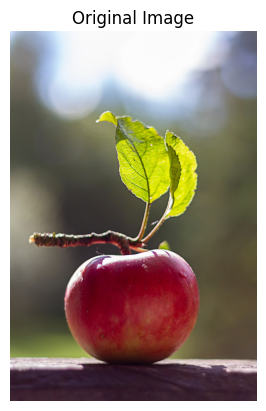

In [ ]:
# loading an image
image = cv2.imread("fruit.avif")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()


In [ ]:
pixels = image.reshape((-1, 3))


In [ ]:
k = 5
kmeans = KMeans(n_clusters=k,random_state= 42)
kmeans.fit(pixels)
cluster_centers = np.uint8(kmeans.cluster_centers_)
labels = kmeans.labels_

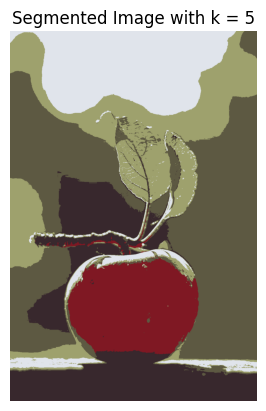

In [ ]:
segmented_data = cluster_centers[labels].reshape(image.shape)
plt.imshow(segmented_data)
plt.title(f"Segmented Image with k = {k}")
plt.axis("off")
plt.show()

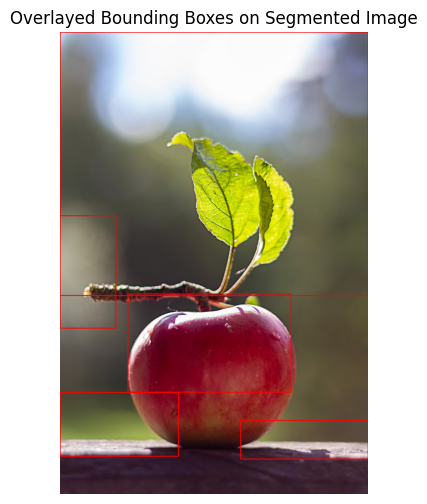

In [ ]:
segmented = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape).astype(np.uint8)

#Convert to grayscale for contour detection
gray = cv2.cvtColor(segmented, cv2.COLOR_RGB2GRAY)

#Threshold to get binary image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#Detect contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Draw bounding boxes around each contour
overlay = image.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if w > 30 and h > 30:  # filter tiny noise
        cv2.rectangle(overlay, (x, y), (x+w, y+h), (255, 0, 0), 2)

#Display the overlay image
plt.figure(figsize=(8, 6))
plt.imshow(overlay)
plt.title("Overlayed Bounding Boxes on Segmented Image")
plt.axis("off")
plt.show()

In [ ]:
#video capture
def process_frame(frame, k=4):
    frame = cv2.resize(frame, (320, 240))  # Resize for speed
    original = frame.copy()

    # Flatten and cluster
    pixels = frame.reshape((-1, 3))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(pixels)
    clustered = kmeans.cluster_centers_[kmeans.labels_].reshape(frame.shape).astype(np.uint8)

    # Convert to grayscale for contour detection
    gray = cv2.cvtColor(clustered, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Detect contours and draw boxes
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if w > 30 and h > 30:
            cv2.rectangle(original, (x, y), (x+w, y+h), (0, 0, 255), 2)

    return original


In [ ]:
#load video
cap = cv2.VideoCapture("cru.mp4")
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    result = process_frame(frame, k=4)
    cv2.imshow("AR Simulation from Recorded Video", result)

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()